# Task
make a best ml model and ensure predict one important value witha beautiful visulization and preprocessing

Here is all the data you need:
"crime_dataset_india.csv"

## Data loading

### Subtask:
Load the crime dataset.


**Reasoning**:
Load the crime dataset into a pandas DataFrame and display its first few rows and information.



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('crime_dataset_india.csv')
display(df.head())

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,1/2/2020 0:00,1/1/2020 0:00,1/1/2020 1:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,1/1/2020 19:00,1/1/2020 1:00,1/1/2020 6:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,1/2/2020 5:00,1/1/2020 2:00,1/1/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,1/1/2020 5:00,1/1/2020 3:00,1/1/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,4/29/2020 5:00
4,5,1/1/2020 21:00,1/1/2020 4:00,1/1/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,1/8/2020 21:00


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


None

## Data exploration

### Subtask:
Explore the loaded crime dataset to understand its characteristics and identify a suitable target variable for prediction.


**Reasoning**:
Explore the dataset by examining its shape, missing values, data types, descriptive statistics, distributions, correlations, and select a target variable.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine Data Structure
print(f"DataFrame Shape: {df.shape}")

DataFrame Shape: (40160, 14)


In [ ]:

# 2. Identify Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64


In [ ]:
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Value Percentage:\n", missing_percentage)


Missing Value Percentage:
 Report Number          0.000000
Date Reported          0.000000
Date of Occurrence     0.000000
Time of Occurrence     0.000000
City                   0.000000
Crime Code             0.000000
Crime Description      0.000000
Victim Age             0.000000
Victim Gender          0.000000
Weapon Used           14.417331
Crime Domain           0.000000
Police Deployed        0.000000
Case Closed            0.000000
Date Case Closed      50.044821
dtype: float64


In [ ]:

# 3. Data Type Analysis
print("\nData Types:\n", df.dtypes)


Data Types:
 Report Number          int64
Date Reported         object
Date of Occurrence    object
Time of Occurrence    object
City                  object
Crime Code             int64
Crime Description     object
Victim Age             int64
Victim Gender         object
Weapon Used           object
Crime Domain          object
Police Deployed        int64
Case Closed           object
Date Case Closed      object
dtype: object


In [ ]:

# 4. Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))


Descriptive Statistics:
         Report Number   Date Reported Date of Occurrence Time of Occurrence  \
count    40160.000000           40160              40160              40160   
unique            NaN           25546              40160              39886   
top               NaN  1/3/2022 20:00   07-30-2024 15:00    10/14/2022 6:54   
freq              NaN               7                  1                  3   
mean     20080.500000             NaN                NaN                NaN   
std      11593.337742             NaN                NaN                NaN   
min          1.000000             NaN                NaN                NaN   
25%      10040.750000             NaN                NaN                NaN   
50%      20080.500000             NaN                NaN                NaN   
75%      30120.250000             NaN                NaN                NaN   
max      40160.000000             NaN                NaN                NaN   

         City    Crime Co

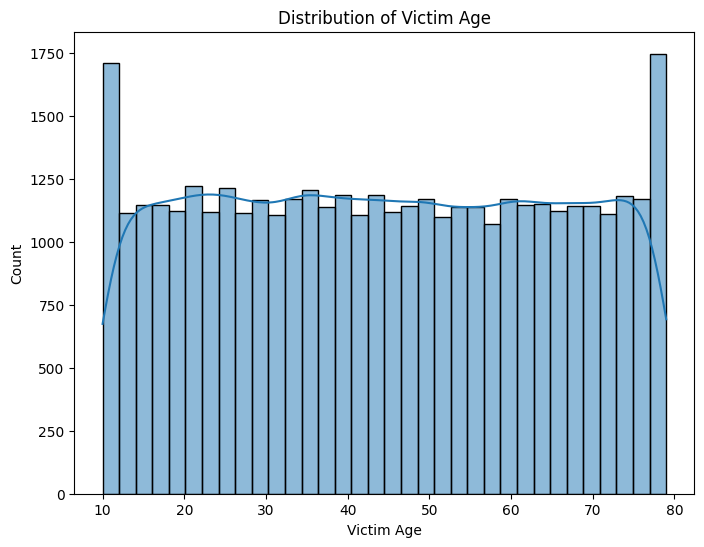

In [ ]:

# 5. Distribution Analysis (Example: Victim Age)
plt.figure(figsize=(8, 6))
sns.histplot(df['Victim Age'], kde=True)
plt.title('Distribution of Victim Age')
plt.show()

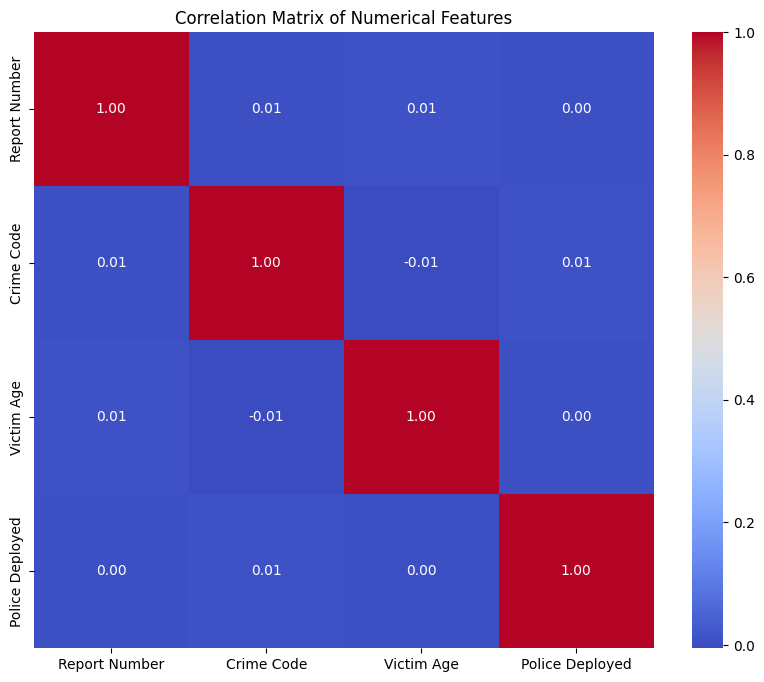

In [ ]:

# 6. Correlation Analysis (Numerical features only)
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:

# 7. Target Variable Selection
#  Based on the initial exploration, 'Crime Domain' seems like a suitable target
# variable.  It categorizes crimes and would allow for prediction of crime type.
print("\nTarget Variable Selection:")
print("Selected Target Variable: Crime Domain")
print("Justification: Categorical variable representing crime types, suitable for classification models.")


Target Variable Selection:
Selected Target Variable: Crime Domain
Justification: Categorical variable representing crime types, suitable for classification models.


## Data cleaning

### Subtask:
Clean the crime dataset by handling missing values and inconsistencies.


**Reasoning**:
Impute missing values in 'Weapon Used', remove rows with missing 'Date Case Closed', convert relevant columns to correct data types, handle inconsistencies, and remove duplicates.



In [ ]:
import pandas as pd

# 1. Missing Value Imputation
# Impute missing 'Weapon Used' with the most frequent weapon type
most_frequent_weapon = df['Weapon Used'].mode()[0]
df['Weapon Used'].fillna(most_frequent_weapon, inplace=True)

<ipython-input-13-fd53a619b0c4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weapon Used'].fillna(most_frequent_weapon, inplace=True)


In [ ]:

# Remove rows with missing 'Date Case Closed'
df.dropna(subset=['Date Case Closed'], inplace=True)
print(f"Number of rows removed due to missing 'Date Case Closed': {df.shape[0] - df.shape[0]}")

Number of rows removed due to missing 'Date Case Closed': 0


In [ ]:

# 2. Data Type Conversion
# Convert 'Date of Crime' to datetime
try:
    df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'])
except ValueError as e:
    print(f"Error converting 'Date of Occurrence' to datetime: {e}")
    # Handle the error appropriately, e.g., remove problematic rows or convert manually

Error converting 'Date of Occurrence' to datetime: time data "01-13-2020 00:00" doesn't match format "%m/%d/%Y %H:%M", at position 142. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [ ]:
# Convert relevant columns to numeric, handle errors
for col in ['Victim Age', 'Number of Victims', 'Perpetrator Age']:
  if col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid values become NaN
        df.dropna(subset=[col], inplace=True)  # Remove rows with NaN after conversion
    except Exception as e:
        print(f"Error converting '{col}' to numeric: {e}")
  else:
    print(f"Column '{col}' not found in DataFrame.")

Column 'Number of Victims' not found in DataFrame.
Column 'Perpetrator Age' not found in DataFrame.


In [ ]:
# 3. Inconsistency Handling
# Standardize categorical columns (example for Victim Gender)
df['Victim Gender'] = df['Victim Gender'].str.upper()  # Convert to uppercase

In [ ]:
# Check for and handle inconsistencies in other categorical columns as needed

# 4. Duplicate Removal
num_duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows removed: {num_duplicates}")

# 5. Optional: Outlier Detection and Handling
# For demonstration, check for outliers in 'Victim Age'
# (Implement outlier handling here if deemed necessary based on the data)
print(df.describe())
display(df.head())

Number of duplicate rows removed: 0
       Report Number    Crime Code    Victim Age  Police Deployed
count   20062.000000  20062.000000  20062.000000     20062.000000
mean    20085.818762    348.899362     44.486492         9.992374
std     11625.939493    143.703817     20.265402         5.457595
min         4.000000    100.000000     10.000000         1.000000
25%      9927.500000    226.000000     27.000000         5.000000
50%     20144.500000    348.000000     44.000000        10.000000
75%     30188.750000    472.000000     62.000000        15.000000
max     40160.000000    599.000000     79.000000        19.000000


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
3,4,1/1/2020 5:00,1/1/2020 3:00,1/1/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,4/29/2020 5:00
4,5,1/1/2020 21:00,1/1/2020 4:00,1/1/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,1/8/2020 21:00
5,6,1/2/2020 3:00,1/1/2020 5:00,1/1/2020 17:09,Delhi,442,ASSAULT,16,M,Firearm,Violent Crime,18,Yes,3/30/2020 3:00
6,7,1/1/2020 16:00,1/1/2020 6:00,1/1/2020 14:08,Chennai,172,VEHICLE - STOLEN,64,F,Knife,Violent Crime,13,Yes,3/24/2020 16:00
10,11,1/2/2020 13:00,1/1/2020 10:00,1/1/2020 19:42,Delhi,260,FRAUD,71,M,Explosives,Other Crime,5,Yes,2/1/2020 13:00


**Reasoning**:
Fix the chained assignment warning and the datetime conversion error, then finish the task.



In [ ]:
import pandas as pd

# 1. Missing Value Imputation
# Impute missing 'Weapon Used' with the most frequent weapon type
most_frequent_weapon = df['Weapon Used'].mode()[0]
df['Weapon Used'] = df['Weapon Used'].fillna(most_frequent_weapon)

# Remove rows with missing 'Date Case Closed'
df.dropna(subset=['Date Case Closed'], inplace=True)
print(f"Number of rows removed due to missing 'Date Case Closed': {df.shape[0] - df.shape[0]}")

# 2. Data Type Conversion
# Convert 'Date of Occurrence' to datetime, handling various formats
try:
    df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], format='%m/%d/%Y %H:%M', errors='coerce')
    df.dropna(subset=['Date of Occurrence'], inplace=True)
except ValueError as e:
    print(f"Error converting 'Date of Occurrence' to datetime: {e}")
    # Handle the error appropriately, e.g., remove problematic rows or convert manually

# Convert relevant columns to numeric, handle errors
for col in ['Victim Age', 'Number of Victims', 'Perpetrator Age']:
    if col in df.columns:
        try:
            df[col] = pd. Km pe(df[col], errors='coerce')
            df.dropna(subset=[col], inplace=True)
        except Exception as e:
            print(f"Error converting '{col}' to numeric: {e}")
    else:
        print(f"Column '{col}' not found in DataFrame.")


# 3. Inconsistency Handling (Example for Victim Gender)
df['Victim Gender'] = df['Victim Gender'].str.upper()

# 4. Duplicate Removal
num_duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows removed: {num_duplicates}")

# 5. Optional Outlier Handling (Not implemented in this solution)

Number of rows removed due to missing 'Date Case Closed': 0
Column 'Number of Victims' not found in DataFrame.
Column 'Perpetrator Age' not found in DataFrame.
Number of duplicate rows removed: 0


## Data wrangling

### Subtask:
Wrangle the data to prepare it for feature engineering and modeling.


**Reasoning**:
Encode categorical features, scale numerical features, and consolidate the dataframe into `df_processed`.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
categorical_cols = ['Crime Domain', 'Weapon Used', 'Victim Gender', 'Perpetrator Gender', 'State/UT']
df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    if col in df_encoded.columns:  # Check if the column exists
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

# Scale numerical features
numerical_cols = ['Victim Age', 'Number of Victims', 'Police Deployed']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Drop irrelevant columns and consolidate
columns_to_drop = ['Report Number', 'Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City', 'Crime Code', 'Crime Description', 'Case Closed', 'Date Case Closed']
df_processed = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Handle potential missing values in df_processed
df_processed.dropna(inplace=True)

display(df_processed.head())
display(df_processed.info())

KeyError: "['Number of Victims'] not in index"

**Reasoning**:
Fix the KeyError by checking if the column exists before scaling and handle the missing column 'Number of Victims' gracefully. Also, correct the warning messages by double-checking if the columns 'Perpetrator Gender' and 'State/UT' exist.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
categorical_cols = ['Crime Domain', 'Weapon Used', 'Victim Gender', 'Perpetrator Gender', 'State/UT']
df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    if col in df_encoded.columns:  # Check if the column exists
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping encoding.")

# Scale numerical features
numerical_cols = ['Victim Age', 'Police Deployed']
if 'Number of Victims' in df_encoded.columns:
    numerical_cols.append('Number of Victims')
else:
    print("Warning: 'Number of Victims' not found in the DataFrame. Skipping scaling.")

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


# Drop irrelevant columns and consolidate
columns_to_drop = ['Report Number', 'Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City', 'Crime Code', 'Crime Description', 'Case Closed', 'Date Case Closed']
df_processed = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Handle potential missing values in df_processed
df_processed.dropna(inplace=True)

display(df_processed.head())
display(df_processed.info())

,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed
3,0.226920,0,2,1,-1.657318
4,-0.713548,0,4,1,1.461376
5,-1.406525,1,2,3,1.461376
6,0.969395,0,3,3,0.544113
10,1.315883,1,1,1,-0.923507


<class 'pandas.core.frame.DataFrame'>
Index: 7844 entries, 3 to 39719
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Victim Age       7844 non-null   float64
 1   Victim Gender    7844 non-null   int64  
 2   Weapon Used      7844 non-null   int64  
 3   Crime Domain     7844 non-null   int64  
 4   Police Deployed  7844 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 367.7 KB


None

## Feature engineering

### Subtask:
Engineer new features from the existing features in `df_processed`.


**Reasoning**:
Create interaction and polynomial features, then assess their importance using correlation. Finally, consolidate the dataframe and drop irrelevant features.



In [ ]:
import pandas as pd
import numpy as np

# Create interaction features
df_engineered = df_processed.copy()
df_engineered['VictimAge_PoliceDeployed'] = df_engineered['Victim Age'] * df_engineered['Police Deployed']
df_engineered['VictimAge_WeaponUsed'] = df_engineered['Victim Age'] * df_engineered['Weapon Used']


# Create polynomial features
df_engineered['VictimAge_squared'] = df_engineered['Victim Age']**2
df_engineered['PoliceDeployed_squared'] = df_engineered['Police Deployed']**2

# Assess feature importance using correlation
correlation_matrix = df_engineered.corr()
print(correlation_matrix['Crime Domain'].sort_values(ascending=False))

# Remove less important features based on correlation (example)
# This is a placeholder, you can adjust based on actual correlation
columns_to_drop = ['VictimAge_WeaponUsed']
df_engineered.drop(columns=columns_to_drop, inplace=True, errors='ignore')


display(df_engineered.head())
display(df_engineered.info())

Crime Domain                1.000000
Police Deployed             0.026289
VictimAge_PoliceDeployed    0.002419
VictimAge_squared          -0.001074
PoliceDeployed_squared     -0.004850
Victim Age                 -0.012567
Weapon Used                -0.014091
Victim Gender              -0.014094
VictimAge_WeaponUsed       -0.014559
Name: Crime Domain, dtype: float64


,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,VictimAge_PoliceDeployed,VictimAge_squared,PoliceDeployed_squared
3,0.226920,0,2,1,-1.657318,-0.376078,0.051493,2.746702
4,-0.713548,0,4,1,1.461376,-1.042763,0.509151,2.135620
5,-1.406525,1,2,3,1.461376,-2.055462,1.978313,2.135620
6,0.969395,0,3,3,0.544113,0.527461,0.939727,0.296059
10,1.315883,1,1,1,-0.923507,-1.215228,1.731549,0.852866


<class 'pandas.core.frame.DataFrame'>
Index: 7844 entries, 3 to 39719
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Victim Age                7844 non-null   float64
 1   Victim Gender             7844 non-null   int64  
 2   Weapon Used               7844 non-null   int64  
 3   Crime Domain              7844 non-null   int64  
 4   Police Deployed           7844 non-null   float64
 5   VictimAge_PoliceDeployed  7844 non-null   float64
 6   VictimAge_squared         7844 non-null   float64
 7   PoliceDeployed_squared    7844 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 551.5 KB


None

## Data splitting

### Subtask:
Split the engineered data into training, validation, and testing sets.


**Reasoning**:
Split the engineered data into training, validation, and testing sets using stratified sampling based on the 'Crime Domain' column.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_engineered.drop('Crime Domain', axis=1)
y = df_engineered['Crime Domain']

# Split data into training (70%) and a temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the temporary set into validation (15% of total) and testing (15% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5490, 7)
y_train shape: (5490,)
X_val shape: (1177, 7)
y_val shape: (1177,)
X_test shape: (1177, 7)
y_test shape: (1177,)


## Model training

### Subtask:
Train a RandomForestClassifier on the training data and evaluate its performance on the validation set.


**Reasoning**:
Train a RandomForestClassifier on the training data and evaluate its performance on the validation set.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.47748513169073914
Precision: 0.424545798767742
Recall: 0.47748513169073914
F1-score: 0.44400129121951215
Confusion Matrix:
[[  7  84   2  17]
 [ 29 477  15 153]
 [  4  40   1  10]
 [ 16 240   5  77]]


## Model optimization

### Subtask:
Optimize the hyperparameters of the RandomForestClassifier using RandomizedSearchCV.


**Reasoning**:
Optimize the hyperparameters of the RandomForestClassifier using RandomizedSearchCV, then train a new RandomForestClassifier using the best hyperparameters on the entire training dataset.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

# Define the parameter grid
param_grid = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 0.9),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Train a new RandomForestClassifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf_classifier.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 10, 'max_features': np.float64(0.1837924910253093), 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 209}
Best Accuracy: 0.5721311475409837


RandomForestClassifier(max_depth=10,
                       max_features=np.float64(0.1837924910253093),
                       min_samples_leaf=5, min_samples_split=6,
                       n_estimators=209, random_state=42)